<a href="https://colab.research.google.com/github/Adhiksha007/AI-Bootcamp/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tongpython/cat-and-dog")

print("Path to dataset files:", path)

100%|██████████| 218M/218M [00:01<00:00, 126MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tongpython/cat-and-dog/versions/1


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [28]:
train = path + "/training_set/training_set"
test = path + "/test_set/test_set"

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 8005 images belonging to 2 classes.


In [31]:
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2023 images belonging to 2 classes.


In [41]:
# map the indices
class_mapping = train_generator.class_indices
# print(class_mapping)
# Extract the class names
class_names = list(class_mapping.keys())
print("Class Names:", class_names)

Class Names: ['cats', 'dogs']


In [32]:
model = models.Sequential()

In [33]:
# First Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Second layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [35]:
# Third layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [36]:
# Fourth layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [37]:
# Flatten
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # original fitting data
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // train_generator.batch_size,
#     epochs=10,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // test_generator.batch_size
# )

In [40]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=test_generator,
    validation_steps=50
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.4917 - loss: 0.7488 - val_accuracy: 0.4944 - val_loss: 0.6940
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.5073 - loss: 0.6933 - val_accuracy: 0.5013 - val_loss: 0.6925
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.5199 - loss: 0.6930 - val_accuracy: 0.5638 - val_loss: 0.6922
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5205 - loss: 0.6922 - val_accuracy: 0.5756 - val_loss: 0.6892
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5237 - loss: 0.6937 - val_accuracy: 0.5044 - val_loss: 0.6925
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.4949 - loss: 0.6922 - val_accuracy: 0.5138 - val_loss: 0.6864
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.5044 - loss: 0.6908 - val_accuracy: 0.5131 - val_loss: 0.6918
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5207 - loss: 0.6912 - val_accuracy: 0.4944 - val_loss:

In [45]:
model.save("CatDog.keras")

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

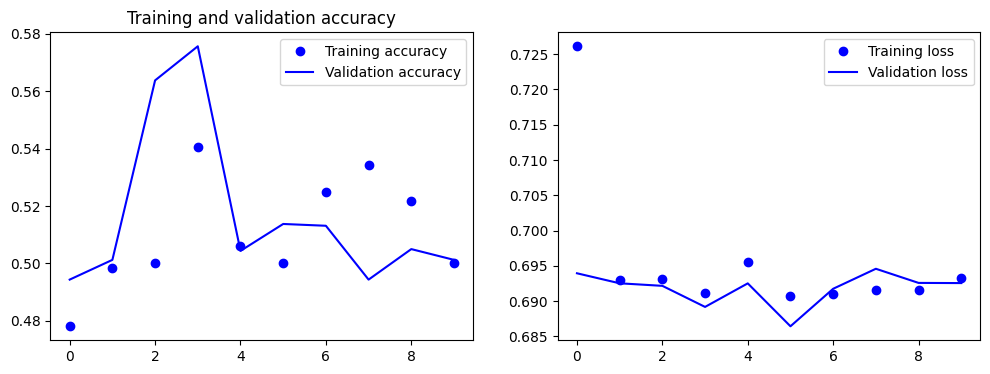

In [43]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

In [46]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [53]:
def predict_img(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [57]:
import os
os.listdir(test+'/dogs')

['dog.4851.jpg',
 'dog.4268.jpg',
 'dog.4508.jpg',
 'dog.4724.jpg',
 'dog.4225.jpg',
 'dog.4056.jpg',
 'dog.4307.jpg',
 'dog.4383.jpg',
 'dog.4756.jpg',
 'dog.4976.jpg',
 'dog.4617(1).jpg',
 'dog.4833.jpg',
 'dog.4426.jpg',
 'dog.4197.jpg',
 'dog.4451.jpg',
 'dog.4528.jpg',
 'dog.4276.jpg',
 'dog.4071.jpg',
 'dog.4539.jpg',
 'dog.4579.jpg',
 'dog.4445.jpg',
 'dog.4084.jpg',
 'dog.4131.jpg',
 'dog.4176.jpg',
 'dog.4820.jpg',
 'dog.4220.jpg',
 'dog.4543.jpg',
 'dog.4637.jpg',
 'dog.4121.jpg',
 'dog.4144.jpg',
 'dog.4212.jpg',
 'dog.4662.jpg',
 'dog.4172.jpg',
 'dog.4086.jpg',
 'dog.4752.jpg',
 'dog.4999.jpg',
 'dog.4102.jpg',
 'dog.4051.jpg',
 'dog.4392.jpg',
 'dog.4675.jpg',
 'dog.4950.jpg',
 'dog.4644.jpg',
 'dog.4011.jpg',
 'dog.4291.jpg',
 'dog.4557.jpg',
 'dog.4530.jpg',
 'dog.4822.jpg',
 'dog.4189.jpg',
 'dog.4303.jpg',
 'dog.4030.jpg',
 'dog.4545.jpg',
 'dog.4589.jpg',
 'dog.4050.jpg',
 'dog.4352.jpg',
 'dog.4328.jpg',
 'dog.4682.jpg',
 'dog.4085.jpg',
 'dog.4689.jpg',
 'dog.4219.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


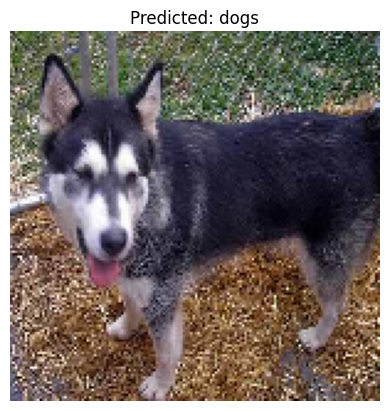

In [58]:
predict_img(test+'/dogs/dog.4292.jpg')